# Assignment decision tree Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"



In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [55]:
# import some data to play with
fraud = pd.read_csv('c:/users/mahesh/datasetcsv/fraud_check.csv')

In [56]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [57]:
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad']) 

In [58]:
fraud['Marital.Status']= label_encoder.fit_transform(fraud['Marital.Status']) 

In [59]:
fraud['Urban']= label_encoder.fit_transform(fraud['Urban']) 

In [60]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [61]:
fraud['des'] = np.where(fraud['Taxable.Income']>30000,"good","risky")


In [62]:
fraud.head(100)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,des
0,0,2,68833,50047,10,1,good
1,1,0,33700,134075,18,1,good
2,0,1,36925,160205,30,1,good
3,1,2,50190,193264,15,1,good
4,0,1,81002,27533,28,0,good
...,...,...,...,...,...,...,...
95,1,2,41395,121498,28,1,good
96,0,2,22258,63622,17,0,risky
97,1,0,79583,37849,19,1,good
98,1,1,22187,77053,18,1,risky


In [63]:
x=fraud.iloc[:,0:6]
y=fraud['des']

In [64]:

x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [65]:
y

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: des, Length: 600, dtype: object

In [66]:
fraud['des'].unique()    


array(['good', 'risky'], dtype=object)

In [67]:
fraud.des.value_counts()


good     476
risky    124
Name: des, dtype: int64

In [68]:
colnames = list(fraud.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'des']

In [86]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [87]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=500)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=500)

[Text(167.4, 163.07999999999998, 'X[2] <= 29949.5\nentropy = 0.722\nsamples = 420\nvalue = [336, 84]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 84\nvalue = [0, 84]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 336\nvalue = [336, 0]')]

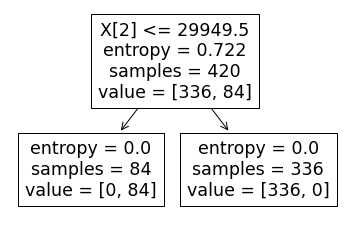

In [89]:
#PLot the decision tree
tree.plot_tree(model)

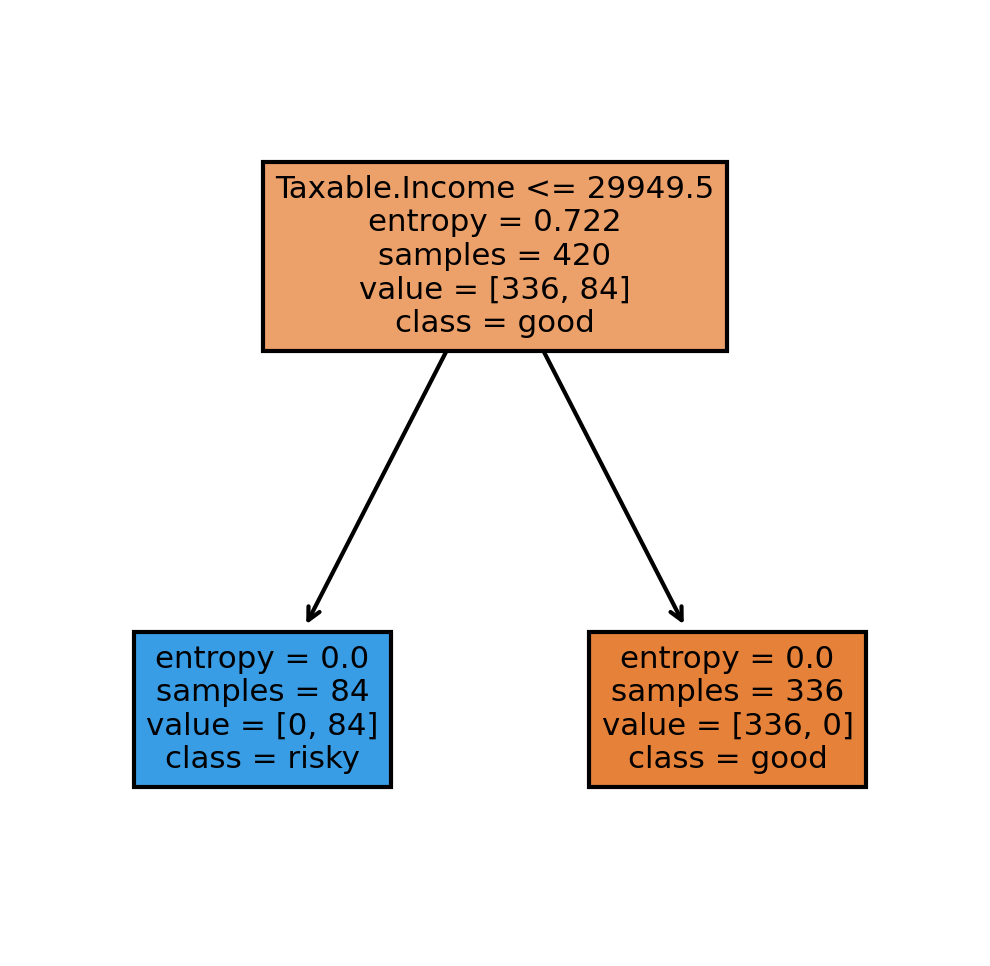

In [90]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [91]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

good     140
risky     40
dtype: int64

In [92]:
preds

array(['good', 'good', 'good', 'good', 'risky', 'risky', 'good', 'risky',
       'risky', 'good', 'good', 'risky', 'risky', 'good', 'risky',
       'risky', 'good', 'good', 'good', 'good', 'good', 'risky', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'risky', 'good', 'good', 'good', 'good', 'good',
       'good', 'risky', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky',
       'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'risky', 'good', 'risky', 'good', 'good', 'good', 'good', 'risky',
       'good', 'good', 'good', 'risky', 'risky', 'risky', 'good', 'good',
       'good', 'good', 'risky', 'risky', 'good', 'good', 'good', 'risky',
       'risky', 'good', 'good', 'good', 'risky', 'good', 'good', 'risky',
       'good', 'good', 'good', 'good', 'good', 'risky', 'ris

In [93]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,good,risky
des,,
good,140,0
risky,0,40


In [94]:
# Accuracy 
np.mean(preds==y_test)

1.0

### Building Decision Tree Classifier (CART) using Gini Criteria

In [80]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [81]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [82]:
#Prediction and computing the accuracy
predg=model_gini.predict(x_test)
np.mean(predg==y_test)#Prediction and computing the accuracy
pred1=model_gini.predict(x_test)
np.mean(pred1==y_test)

1.0

[Text(167.4, 163.07999999999998, 'X[2] <= 29949.5\ngini = 0.32\nsamples = 480\nvalue = [384, 96]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 96\nvalue = [0, 96]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 384\nvalue = [384, 0]')]

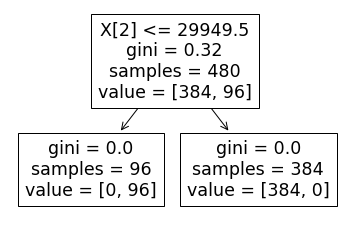

In [83]:
#PLot the decision tree
tree.plot_tree(model_gini)

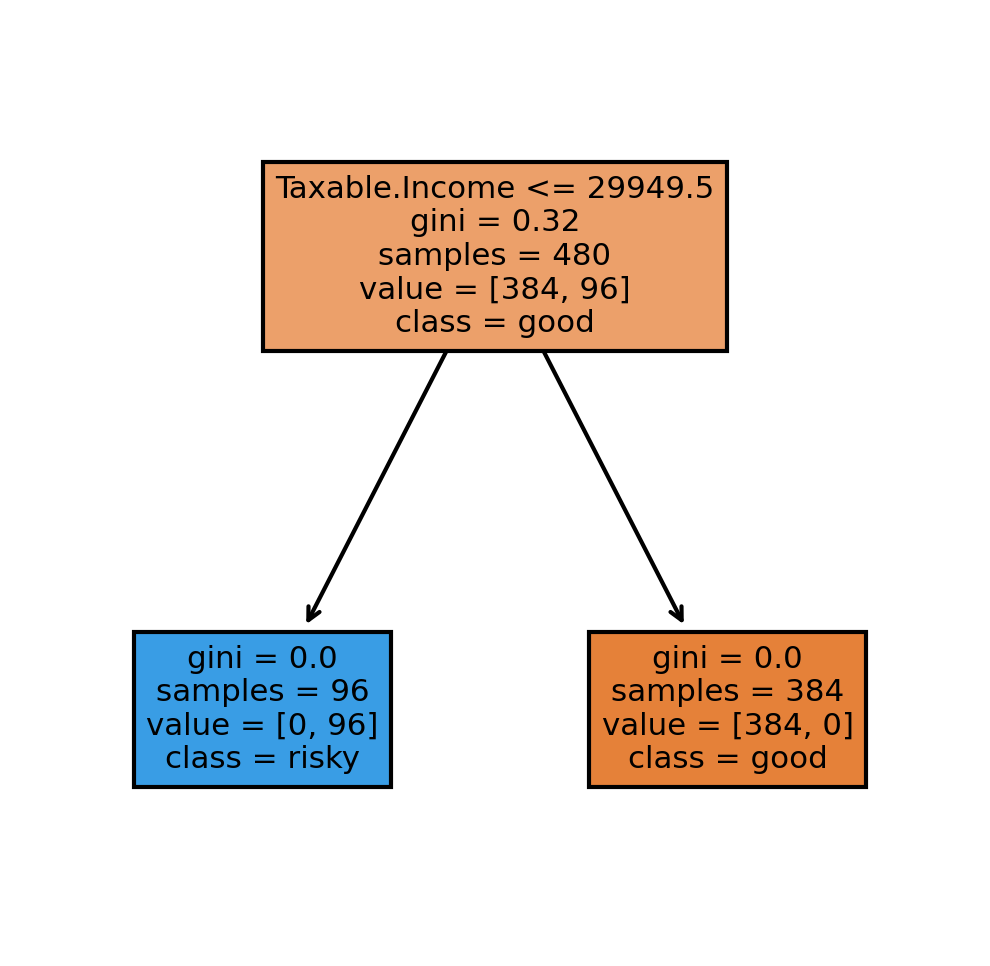

In [85]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

#### Decision Tree Regression Example

In [33]:
fraud['regres'] = np.where(fraud['Taxable.Income']>30000,1,0)

In [34]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,des,regres
0,0,2,68833,50047,10,1,good,1
1,1,0,33700,134075,18,1,good,1
2,0,1,36925,160205,30,1,good,1
3,1,2,50190,193264,15,1,good,1
4,0,1,81002,27533,28,0,good,1
...,...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,good,1
596,1,0,69967,55369,2,1,good,1
597,0,0,47334,154058,0,1,good,1
598,1,1,98592,180083,17,0,good,1


In [35]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [36]:
array = fraud.values
X = array[:,0:5]
y = array[:,7]

In [38]:
X

array([[0, 2, 68833, 50047, 10],
       [1, 0, 33700, 134075, 18],
       [0, 1, 36925, 160205, 30],
       ...,
       [0, 0, 47334, 154058, 0],
       [1, 1, 98592, 180083, 17],
       [0, 0, 96519, 158137, 16]], dtype=object)

In [39]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [43]:
model_reg = DecisionTreeRegressor()
model_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [44]:
model_reg.score(X_test,y_test)

1.0

# Inference: The decision tree with entropy, gini and logistic reggressor models  is 100 % accurate  in predicting the fraud data with reference to  income  
